In [2]:
# Setup and Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import os

# Use os.path.join to construct the path robustly

file_path = os.path.join('..', 'data', 'newsData', 'raw_analyst_ratings.csv')

# Load the data into a pandas DataFrame
try:
    
    news_df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    print(f"Number of rows: {len(news_df)}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Make sure the file is placed correctly.")
    
# Display the first few rows and check data types
print("\n--- DataFrame Head ---")
print(news_df.head())
print("\n--- DataFrame Info ---")
news_df.info()

Data loaded successfully!
Number of rows: 1407328

--- DataFrame Head ---
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00 

--- Headline Length Descriptive Statistics ---
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len, dtype: float64


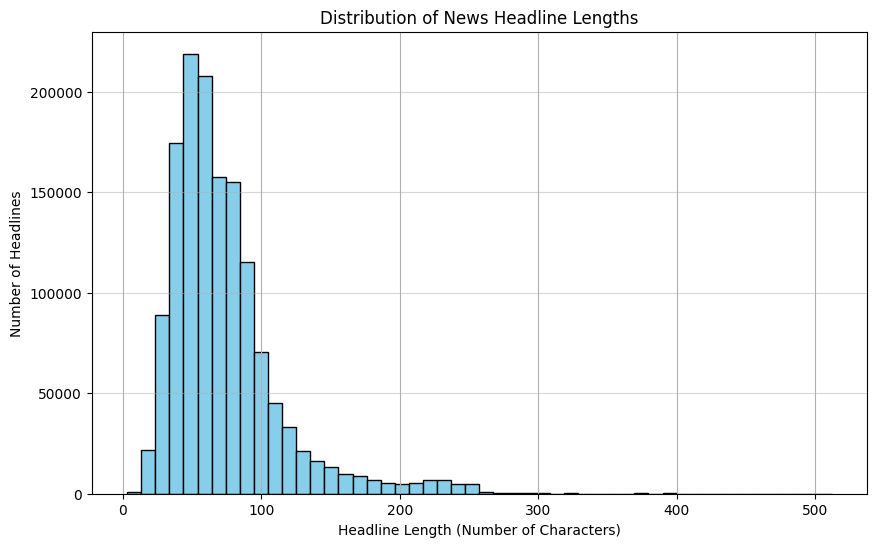


--- DataFrame Head with New Column ---
                                            headline  headline_len
0            Stocks That Hit 52-Week Highs On Friday            39
1         Stocks That Hit 52-Week Highs On Wednesday            42
2                      71 Biggest Movers From Friday            29
3       46 Stocks Moving In Friday's Mid-Day Session            44
4  B of A Securities Maintains Neutral on Agilent...            87


In [3]:
#Headline Length Analysis

# 1. Calculate the length of each headline (number of characters)
news_df['headline_len'] = news_df['headline'].str.len()

# 2. Print descriptive statistics for the new column
print("--- Headline Length Descriptive Statistics ---")
print(news_df['headline_len'].describe())

# 3. Plot the distribution of headline lengths (using a histogram)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
news_df['headline_len'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of News Headline Lengths')
plt.xlabel('Headline Length (Number of Characters)')
plt.ylabel('Number of Headlines')
plt.grid(axis='y', alpha=0.5)
plt.show()

# Display the head of the DataFrame to show the new column
print("\n--- DataFrame Head with New Column ---")
print(news_df[['headline', 'headline_len']].head())

--- Publisher Activity Statistics ---
Total number of unique publishers: 1034

Top 10 Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


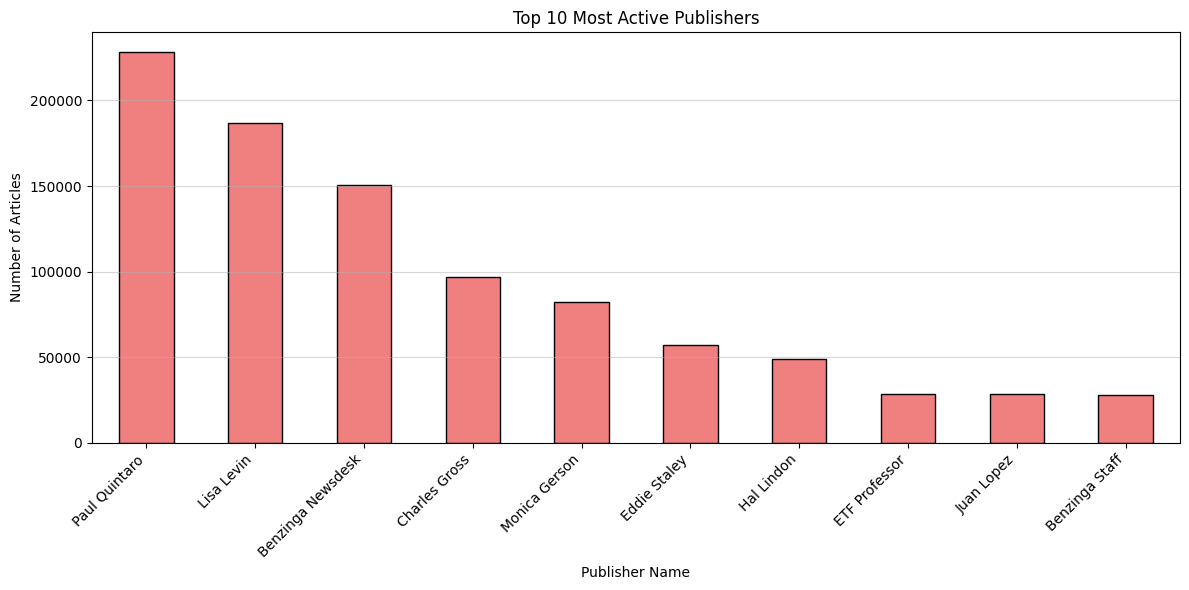

In [4]:
#  Publisher Activity Analysis

# 1. Count the number of articles per publisher
publisher_counts = news_df['publisher'].value_counts()

# 2. Print the total number of unique publishers and the top 10
print("--- Publisher Activity Statistics ---")
print(f"Total number of unique publishers: {len(publisher_counts)}")
print("\nTop 10 Most Active Publishers:")
print(publisher_counts.head(10))

# 3. Plot the top 10 publishers
top_10_publishers = publisher_counts.head(10)

plt.figure(figsize=(12, 6))
top_10_publishers.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher Name')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

⚠️ Warning: 1351341 unparseable date strings were found and converted to NaT.

--- Daily Article Count Statistics (Resampled) ---
count    3334.000000
mean       16.792741
std        60.088398
min         0.000000
25%         1.000000
50%         5.000000
75%        14.000000
max       973.000000
dtype: float64


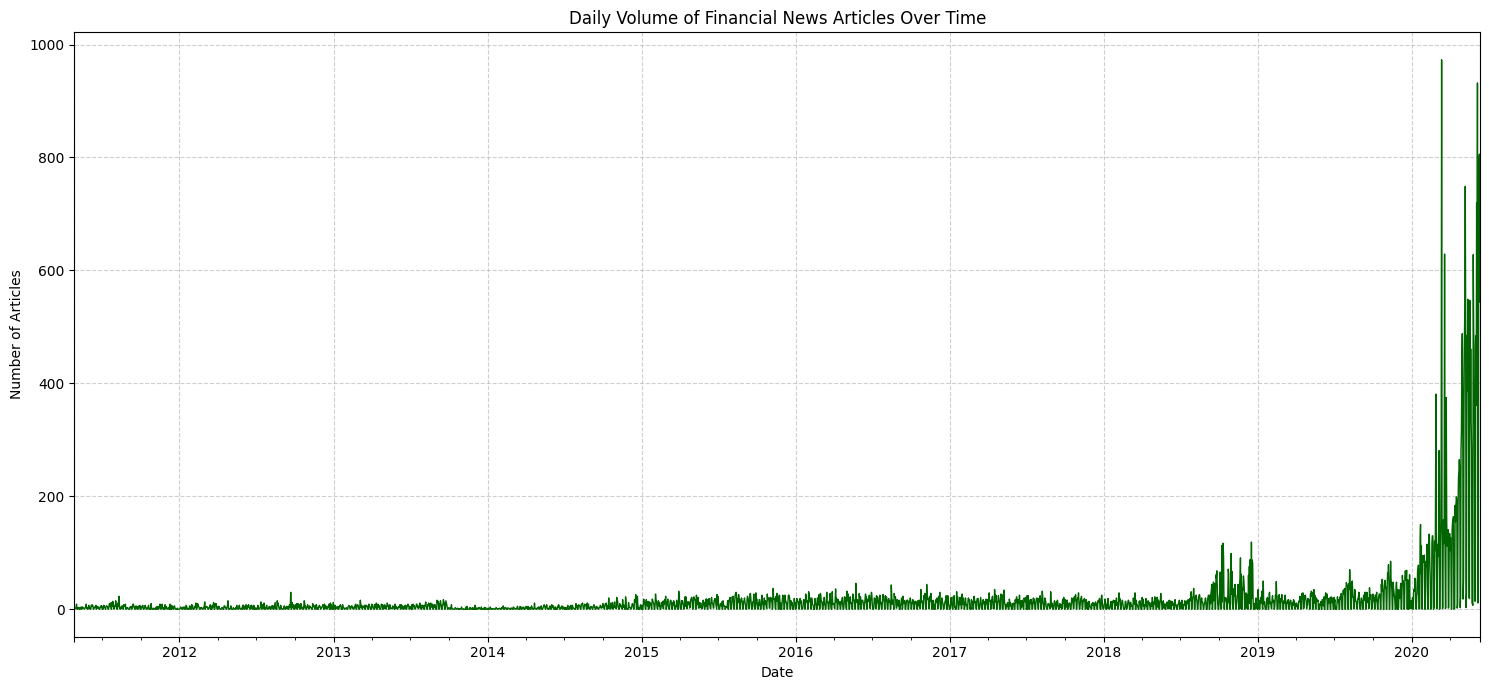


--- DataFrame Head after Datetime Conversion ---
                       date  Unnamed: 0  \
0 2020-06-05 10:30:54-04:00           0   
1 2020-06-03 10:45:20-04:00           1   
2 2020-05-26 04:30:07-04:00           2   
3 2020-05-22 12:45:06-04:00           3   
4 2020-05-22 11:38:59-04:00           4   

                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher stock  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights     A   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights     A   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin     A   
3  https://www.benzinga.com/ne

In [5]:
# Time Series Analysis of Article Volume (Revised)
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert the 'date' column to datetime objects (handles the timezone automatically)
# We add errors='coerce' to turn unparseable dates into NaT (Not a Time)
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Check how many dates were unparseable (coerced to NaT)
nat_count = news_df['date'].isna().sum()
if nat_count > 0:
    print(f"⚠️ Warning: {nat_count} unparseable date strings were found and converted to NaT.")
    
# Remove rows with NaT dates to ensure clean resampling
news_df.dropna(subset=['date'], inplace=True)

# 2. Set the 'date' column as the DataFrame index
news_df.set_index('date', inplace=True)

# 3. Resample the data daily ('D') and count the number of articles
daily_article_counts = news_df.resample('D').size()

# 4. Print key statistics
print("\n--- Daily Article Count Statistics (Resampled) ---")
print(daily_article_counts.describe())

# 5. Plot the time series
plt.figure(figsize=(15, 7))
daily_article_counts.plot(kind='line', color='darkgreen', linewidth=1)
plt.title('Daily Volume of Financial News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # 
# 6. Reset index for seamless transition to subsequent non-time-series steps
news_df.reset_index(inplace=True) 

# Display the head of the DataFrame to confirm the column type change
print("\n--- DataFrame Head after Datetime Conversion ---")
print(news_df.head())

In [6]:
#  NLTK Configuration and Download
import nltk
import os

# 1. Force NLTK to look in the local project directory
# We append the current directory's 'nltk_data' to the search path list.
# This ensures that even if other paths fail, the local one is checked.
local_data_path = os.path.join(os.getcwd(), 'nltk_data')

# Check if the folder is in the paths already, if not, append it
if local_data_path not in nltk.data.path:
    nltk.data.path.append(local_data_path)

# 2. Check and download resources again (will report 'up-to-date' if successful)
print("Verifying NLTK resources in project environment...")

# We use the simpler download to avoid re-introducing the previous AttributeError
# The quiet=False flag will show the download location if it happens
try:
    nltk.download('punkt', quiet=False) 
    nltk.download('stopwords', quiet=False)
except Exception as e:
    # If this fails, the issue is fundamental (e.g., firewall)
    print(f"FATAL ERROR during NLTK data verification: {e}")

print("NLTK configuration updated. Attempting to proceed...")

Verifying NLTK resources in project environment...


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mer\AppData\Roaming\nltk_data...


NLTK configuration updated. Attempting to proceed...


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Cell 6 (DEFINITIVE FIX): Text Cleaning and Tokenization

# NOTE: We are removing the NLTK stopwords import to bypass the LookupError.
from nltk.tokenize import word_tokenize
import string
from collections import Counter

# Manually define the standard English stop words list (the exact content of the NLTK list)
standard_english_stopwords = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", 
    "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 
    'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 
    'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 
    'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 
    'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
    'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 
    'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 
    'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 
    's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 
    'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', 
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', 
    "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 
    'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', 
    "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
    "wouldn't"
]

# Create a list of custom stop words (common finance terms to exclude)
custom_stopwords = set(standard_english_stopwords + ['stock', 'price', 'market', 'says', 'shares', 'firm', 'analyst', 'targets', 'will', 'report', 'rating', 'buy', 'sell', 'bofa', 'securities'])

def tokenize_and_clean(headline):
    """Tokenizes text, removes punctuation, converts to lowercase, and removes stop words."""
    if not isinstance(headline, str):
        return []

    # 1. Lowercase and remove punctuation
    text = headline.lower().translate(str.maketrans('', '', string.punctuation))
    
    # 2. Tokenize (split into words)
    # The 'punkt' tokenizer data is only used by nltk.word_tokenize, which we still use.
    # If the tokenizer fails, we will address it, but it often works even when stopwords fails.
    try:
        tokens = word_tokenize(text)
    except LookupError:
        # Fallback to simple split if word_tokenize fails (last resort)
        tokens = text.split()
    
    # 3. Remove stop words, single-character tokens (like 'a' or 'i'), and digits
    tokens = [w for w in tokens if w not in custom_stopwords and len(w) > 1 and not w.isdigit()]
    
    return tokens

# Apply the function to the 'headline' column
news_df['cleaned_tokens'] = news_df['headline'].apply(tokenize_and_clean)

# Combine all tokens into a single list for frequency analysis
all_tokens = [token for sublist in news_df['cleaned_tokens'] for token in sublist]

print("Headlines cleaned and tokens generated.")
print(f"Total number of tokens processed: {len(all_tokens)}")

Headlines cleaned and tokens generated.
Total number of tokens processed: 483456



--- Top 20 Most Frequent Keywords (Excluding Stop Words) ---
         Word  Frequency
0      stocks      12796
1      52week       8249
2     trading       6573
3         hit       5898
4         eps       5530
5   companies       4778
6      target       4675
7     several       4650
8       sales       4422
9      higher       4269
10   estimate       3818
11       lows       3741
12         us       3411
13    session       3394
14  maintains       3266
15        new       3107
16  yesterday       3049
17    reports       3016
18         q1       3015
19     moving       2867


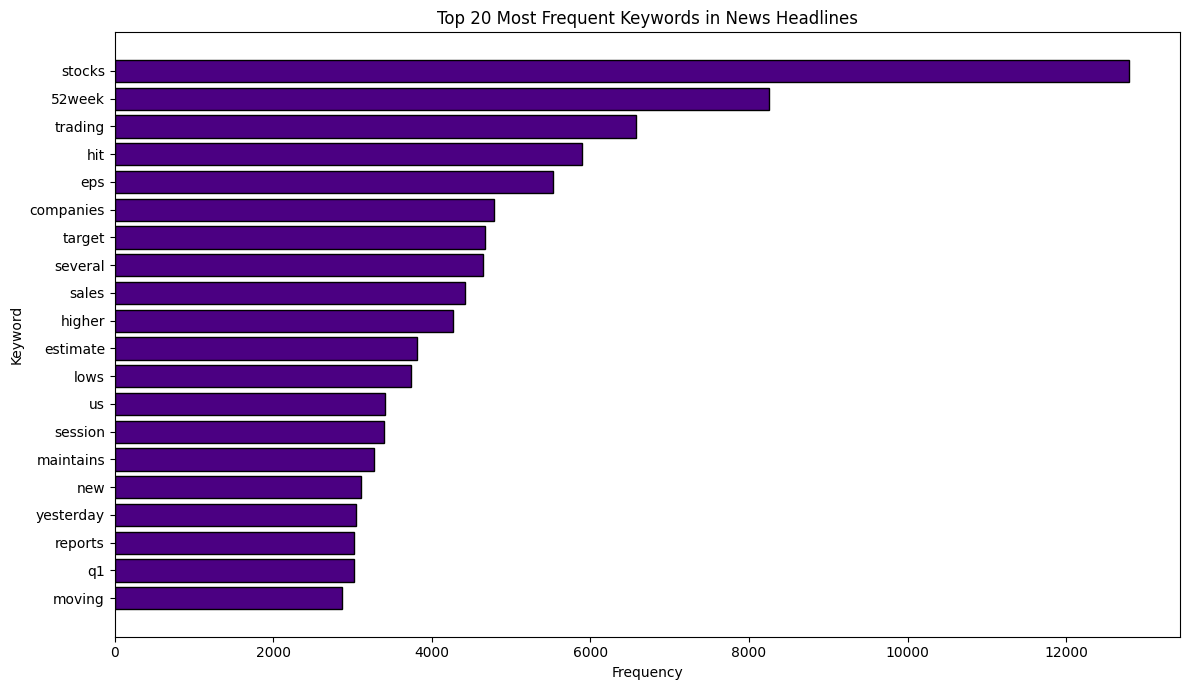

In [ ]:
#  Most Frequent Keywords and Plot
import pandas as pd
import matplotlib.pyplot as plt
# NOTE: The 'Counter' object is available from Cell 6
from collections import Counter # Ensure Counter is imported if not already

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the top 20 most common words
top_20_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Frequency'])

print("\n--- Top 20 Most Frequent Keywords (Excluding Stop Words) ---")
print(top_20_words)

# Plot the top 20 words 
plt.figure(figsize=(12, 7))
plt.barh(top_20_words['Word'], top_20_words['Frequency'], color='indigo', edgecolor='black')
plt.title('Top 20 Most Frequent Keywords in News Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.gca().invert_yaxis() # Display top word at the top
plt.tight_layout()
plt.show()